In [4]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [5]:
import kagglehub
path = kagglehub.dataset_download("clmentbisaillon/fake-and-real-news-dataset")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'fake-and-real-news-dataset' dataset.
Path to dataset files: /kaggle/input/fake-and-real-news-dataset


In [6]:
import os
print(os.listdir(path))

['.nfs000000005667510c0000009c', 'True.csv', 'Fake.csv']


In [7]:
fake = pd.read_csv(os.path.join(path, "Fake.csv"))
real = pd.read_csv(os.path.join(path, "True.csv"))

print("Fake shape:", fake.shape)
print("Real shape:", real.shape)


Fake shape: (23481, 4)
Real shape: (21417, 4)


In [8]:
fake["label"]=0
real["label"]=1

df = pd.concat([fake, real]).reset_index(drop=True)
df = df.sample(frac=1).reset_index(drop=True)
df.head()


,title,text,subject,date,label
0,Republican Lawmakers Helped Orchestrate The B...,These Republican politicians should be in jail...,News,"March 18, 2016",0
1,Trump Throws Intelligence Community Under The...,President Bone Spurs finally made it to Vietna...,News,"November 11, 2017",0
2,"Obama, Mexican president discuss immigration, ...",WASHINGTON (Reuters) - U.S. President Barack O...,politicsNews,"May 6, 2016",1
3,U.N. beefs up guards as it scales up presence ...,ROME (Reuters) - The United Nations is prepari...,worldnews,"September 8, 2017",1
4,Cuba welcomes ambassador nomination but says O...,HAVANA (Reuters) - President Barack Obama’s no...,politicsNews,"September 28, 2016",1


In [9]:
df["content"] = df["title"]+" "+df["text"]

In [10]:
def clean_text(text):
  text=text.lower()
  text=re.sub(r'https?://\S+','',text)
  text=re.sub(r'[%s]' % re.escape(string.punctuation),'',text)
  text=re.sub(r'\n', '',text)
  return text

df["content"] = df["content"].apply(clean_text)

In [13]:
X = df["content"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
vectorizer = TfidfVectorizer(max_features=10000)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

1. ***Logistic Regression***

In [15]:
lr = LogisticRegression()
lr.fit(X_train_vec, y_train)

LogisticRegression()

In [17]:

lr_pred = lr.predict(X_test_vec)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))

Logistic Regression Accuracy: 0.9884187082405346


2.***Naive Bayes***

In [18]:
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

MultinomialNB()

In [19]:
nb_pred = nb.predict(X_test_vec)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))

Naive Bayes Accuracy: 0.9365256124721604


3. ***SVM***

In [21]:
svm = LinearSVC()
svm.fit(X_train_vec, y_train)

LinearSVC()

In [22]:
svm_pred = svm.predict(X_test_vec)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

SVM Accuracy: 0.9939866369710467


In [23]:
print(classification_report(y_test, svm_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4723
           1       0.99      0.99      0.99      4257

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



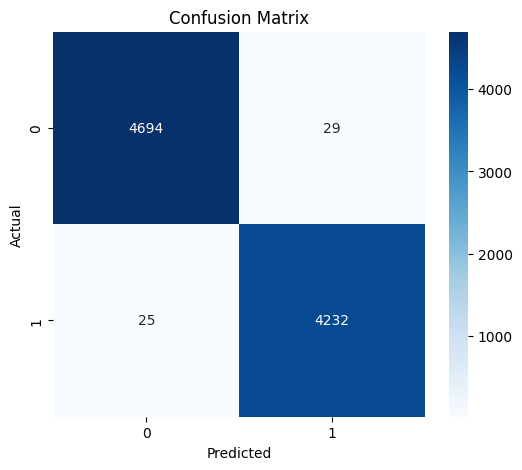

In [25]:
cm = confusion_matrix(y_test, svm_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [33]:
def predict_news(test):
  text = clean_text(test)
  vectorized_text = vectorizer.transform([test])
  prediction = svm.predict(vectorized_text)

  if prediction[0] == 0:
    return "Fake News"
  else:
    return "Real News"

In [34]:
predict_news("Breaking: Government secretly planning alien invasion")

'Fake News'

In [35]:
import joblib

joblib.dump(svm, "fake_news_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")


['vectorizer.pkl']

In [36]:
from google.colab import files
files.download("fake_news_model.pkl")
files.download("vectorizer.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>